In [1]:
import pandas as pd

from collections import Counter
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import nltk
from nltk import ngrams

In [3]:
df = pd.read_csv('preprocessed_data.csv')

In [4]:
df['transcript']

0     ['música', 'llegar', 'lisboa', 'ilusión', 'gan...
1     ['miedo', 'ver', 'bienvenido', 'vídeo', 'canal...
2     ['música', 'bienvenido', 'canal', 'vídeo', 'co...
3     ['música', 'querer', 'daño', 'ir', 'daño', 'mu...
4     ['coche', 'acabar', 'vacunar', 'valer', 'plan'...
                            ...                        
80    ['preparar', 'poner', 'linda', 'amiga', 'amar'...
81    ['ver', 'noche', 'estar', 'matar', 'libérame',...
82    ['canal', 'poder', 'serie', 'tip', 'sesión', '...
83    ['poder', 'seguir', 'instagram', 'llamar', 'mu...
84    ['música', 'traer', 'vídeo', 'canal', 'vídeo',...
Name: transcript, Length: 85, dtype: object

In [5]:
occurrences_per_transcript = df['transcript'].str.count(r'xxxx')

# Calculate total occurrences
total_insults = occurrences_per_transcript.sum()

# Calculate average occurrence per transcript
average_occurrence = total_insults / len(df)

print(f"Average occurrences of 'insultar' per transcript: {average_occurrence:.2f}")
print(f"Total occurrences of 'insultar' per transcript: {total_insults:.2f}")

Average occurrences of 'insultar' per transcript: 0.31
Total occurrences of 'insultar' per transcript: 26.00


In [6]:
import ast

processed_transcripts = df['transcript'].apply(ast.literal_eval)


In [7]:
type(processed_transcripts)

pandas.core.series.Series

In [8]:
# 1. Identify commonly used phrases using N-grams
all_ngrams = [ngram for transcript in processed_transcripts for ngram in ngrams(transcript, 3)]  # trigrams
common_phrases = Counter(all_ngrams).most_common(20)
print("Common Phrases:")
for phrase, freq in common_phrases:
    print(f"{' '.join(phrase)}: {freq}")

Common Phrases:
música música música: 38
traer vídeo canal: 30
esperar gustar muchísimo: 20
música aplauso música: 16
música ah música: 14
muchísimo muchísimo muchísimo: 14
música i música: 13
súper súper súper: 11
esperar gustar vídeo: 11
vídeo canal veis: 10
encantar encantar encantar: 10
vídeo canal traer: 9
gustar muchísimo muchísimo: 9
música músico música: 8
gustar muchísimo vídeo: 8
music music music: 8
querer muchísimo muchísimo: 7
ah música música: 6
habéis visto vídeo: 6
música música ah: 6


In [9]:
# 2. Identify topics using LDA
dictionary = Dictionary(processed_transcripts)
corpus = [dictionary.doc2bow(transcript) for transcript in processed_transcripts]
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=5, passes=15, workers=4)
print("\nTopics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx}, Words: {topic}")


Topics:
Topic: 0, Words: 0.028*"música" + 0.016*"cosa" + 0.010*"vídeo" + 0.009*"querer" + 0.008*"súper" + 0.007*"valer" + 0.007*"año" + 0.006*"gustar" + 0.006*"ver" + 0.006*"encantar"
Topic: 1, Words: 0.014*"gustar" + 0.013*"cosa" + 0.012*"querer" + 0.011*"vídeo" + 0.010*"estudiar" + 0.009*"tener" + 0.009*"vivir" + 0.009*"vida" + 0.008*"persona" + 0.008*"arte"
Topic: 2, Words: 0.017*"súper" + 0.013*"gustar" + 0.012*"comprar" + 0.012*"muchísimo" + 0.011*"encantar" + 0.011*"blanco" + 0.011*"quedar" + 0.010*"bikini" + 0.009*"vídeo" + 0.008*"negro"
Topic: 3, Words: 0.016*"foto" + 0.008*"vídeo" + 0.007*"gente" + 0.007*"music" + 0.005*"poner" + 0.005*"poder" + 0.005*"valer" + 0.005*"quedar" + 0.005*"ejemplo" + 0.005*"cámara"
Topic: 4, Words: 0.011*"vídeo" + 0.010*"gustar" + 0.010*"cosa" + 0.008*"aplicación" + 0.008*"música" + 0.007*"foto" + 0.007*"valer" + 0.007*"poner" + 0.006*"súper" + 0.006*"quedar"


In [10]:
# 3. Identify unique terms/values using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.85)
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(transcript) for transcript in processed_transcripts])
feature_names = tfidf_vectorizer.get_feature_names_out()
sorted_items = sorted(list(enumerate(tfidf_matrix.sum(axis=0).tolist()[0])), key=lambda x: x[1], reverse=True)
print("\nUnique Terms:")
for idx, score in sorted_items[:10]:
    print(f"{feature_names[idx]}: {score}")



Unique Terms:
gustar: 5.160647713553408
comprar: 4.073495799647887
poner: 4.049386840246329
muchísimo: 4.017574403983856
encantar: 3.9891803398811363
valer: 3.9453099182079345
quedar: 3.362827261149701
foto: 3.13180088256254
año: 3.130966511028955
tener: 3.111960728365843


In [11]:
all_tokens = [token for transcript in processed_transcripts for token in transcript]

# Count the occurrences of each token
word_freq = Counter(all_tokens)

# Display the 10 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('música', 832), ('cosa', 671), ('vídeo', 568), ('gustar', 533), ('súper', 527), ('querer', 464), ('encantar', 372), ('valer', 369), ('muchísimo', 329), ('comprar', 322), ('poner', 321), ('ver', 320), ('quedar', 320), ('año', 284), ('tener', 279)]
         Word  Frequency
0      música        832
1        cosa        671
2       vídeo        568
3      gustar        533
4       súper        527
5      querer        464
6    encantar        372
7       valer        369
8   muchísimo        329
9     comprar        322
10      poner        321
11        ver        320
12     quedar        320
13        año        284
14      tener        279


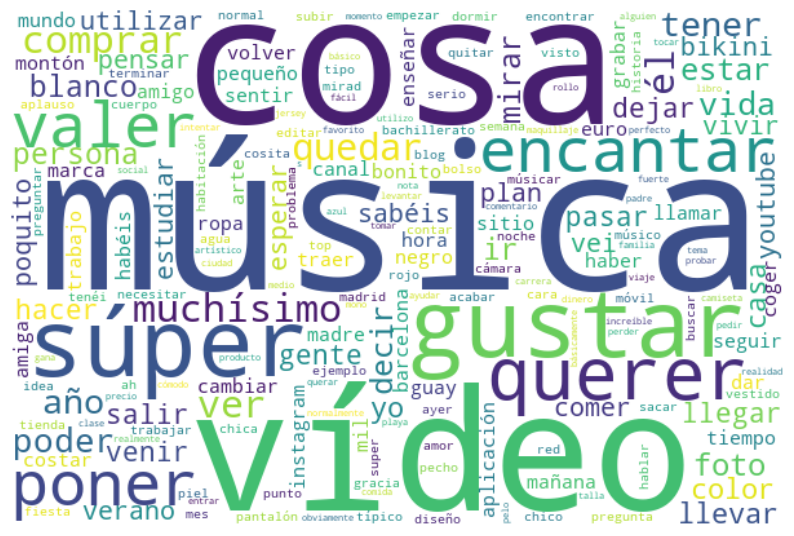

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Convert the list of tokens back into a single string for each transcript
all_text = ' '.join([' '.join(transcript) for transcript in processed_transcripts])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(all_text)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("transcript_wordcloud.png")

plt.show()